### What is DCT ?

- Tao Wang
- June 19, 2019

- I created arbitray c at 3-dimensional grids and try to understand DCT with different approximations. 
- Once my experiments here go through. I will take it to the DCT-Copula notebook to plot the consumption functions there.

In [1]:
def in_ipynb():
    try:
        if str(type(get_ipython())) == "<class 'ipykernel.zmqshell.ZMQInteractiveShell'>":
            return True
        else:
            return False
    except NameError:
        return False

# Determine whether to make the figures inline (for spyder or jupyter)
# vs whatever is the automatic setting that will apply if run from the terminal
if in_ipynb():
    # %matplotlib inline generates a syntax error when run from the shell
    # so do this instead
    get_ipython().run_line_magic('matplotlib', 'inline') 
else:
    get_ipython().run_line_magic('matplotlib', 'auto') 

In [2]:
import scipy.fftpack as sf  # scipy discrete fourier transform
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
## DCT in 1 dimension
grids = np.linspace(0,10,100)
c_grids = grids**3-grids**2-np.log(grids+1)

In [4]:
# an example with threshold 0.9
c_dct = sf.dct(c_grids)
c_dct_rdc = c_dct*(abs(c_dct)>0.9*c_dct.max())
c_approx = sf.idct(c_dct_rdc)
c_diff =abs(c_approx-c_grids)

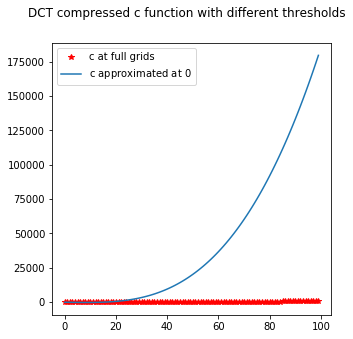

In [5]:
## DCT for the c at full grids 

fig = plt.figure(figsize=(5,5))
fig.suptitle('DCT compressed c function with different thresholds')
val_lst = np.array([0])
plt.plot(c_grids,'r*',label='c at full grids')
for i in range(len(val_lst)):
    c_dct_rdc = c_dct*(abs(c_dct)>val_lst[i]*c_dct.max())
    c_approx = sf.idct(c_dct_rdc)
    plt.plot(c_approx,label=r'c approximated at ${}$'.format(val_lst[i]))
plt.legend(loc=0)

In [6]:
## blockwise DCT 
size = c_grids.shape
c_dct = np.zeros(size)

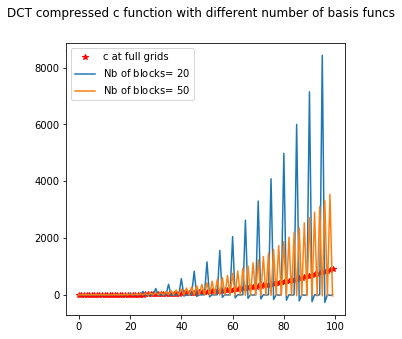

In [7]:
## blockwise DCT 

fig = plt.figure(figsize=(5,5))
fig.suptitle('DCT compressed c function with different number of basis funcs')
nbs_lst = np.array([20,50])
plt.plot(c_grids,'r*',label='c at full grids')
for i in range(len(nbs_lst)):
    delta = np.int(size[0]/nbs_lst[i])
    for pos in np.r_[:size[0]:delta]:
        c_dct[pos:(pos+delta)] = sf.dct(c_grids[pos:(pos+delta)])
    plt.plot(c_dct,label=r'Nb of blocks= ${}$'.format(nbs_lst[i]))
plt.legend(loc=0)

In [25]:
# DCT in 2 dimension 
# arbitrarily generate a consumption function at different grid points 
np.random.seed(9001)
grid0=20
grid1=20
c_grids = np.random.randint(0,10,grid0*grid1).reshape([grid0,grid1])

In [26]:
# an example with threshold 0.9
c_dct0 = sf.dct(c_grids,axis=0,norm='ortho')
c_dct = sf.dct(c_dct0,axis=1,norm='ortho')
c_dct_rdc = c_dct*(abs(c_dct)>0.9*c_dct.max())
c_approx0 = sf.idct(c_dct_rdc,axis=0,norm='ortho')
c_approx = sf.idct(c_approx0,axis=0,norm='ortho').reshape(grid0,grid1)
c_diff =abs(c_approx-c_grids)

Keeping only 100.0 percent of the DCT coefficients
Keeping only 100.0 percent of the DCT coefficients
Keeping only 98.5 percent of the DCT coefficients
Keeping only 0.25 percent of the DCT coefficients
Keeping only 0.25 percent of the DCT coefficients


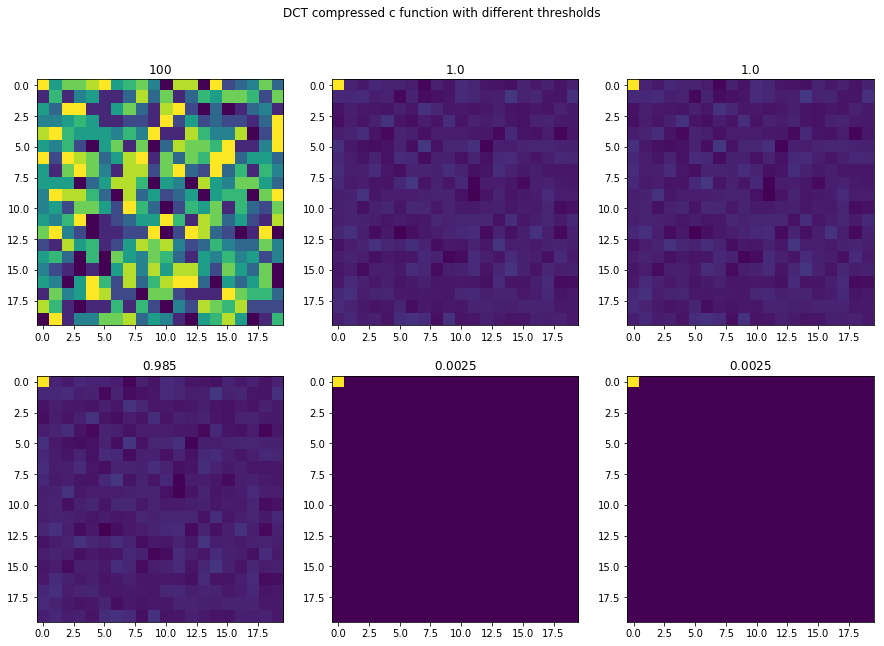

In [27]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('DCT compressed c function with different thresholds')
val_lst = np.array([0.000000001,0.00001,0.001,0.1,0.9])
ax=fig.add_subplot(2,3,1)
ax.imshow(c_grids)
ax.set_title(r'$100%$')
for i in range(len(val_lst)):
    dct_bool = abs(c_dct)>val_lst[i]*c_dct.max()
    c_dct_rdc = c_dct*(dct_bool)
    c_approx0 = sf.idct(c_dct_rdc,axis=0,norm='ortho')
    c_approx = sf.idct(c_approx0,axis=0,norm='ortho').reshape(grid0,grid1)
    c_approx =c_dct_rdc
    percent_nonzeros = np.sum(dct_bool)/(grid0*grid1*1.0)
    print("Keeping only " +str(percent_nonzeros*100)+ " percent of the DCT coefficients")
    ax = fig.add_subplot(2,3,i+2)
    ax.set_title(r'${}%$'.format(percent_nonzeros))
    ax.imshow(c_approx)

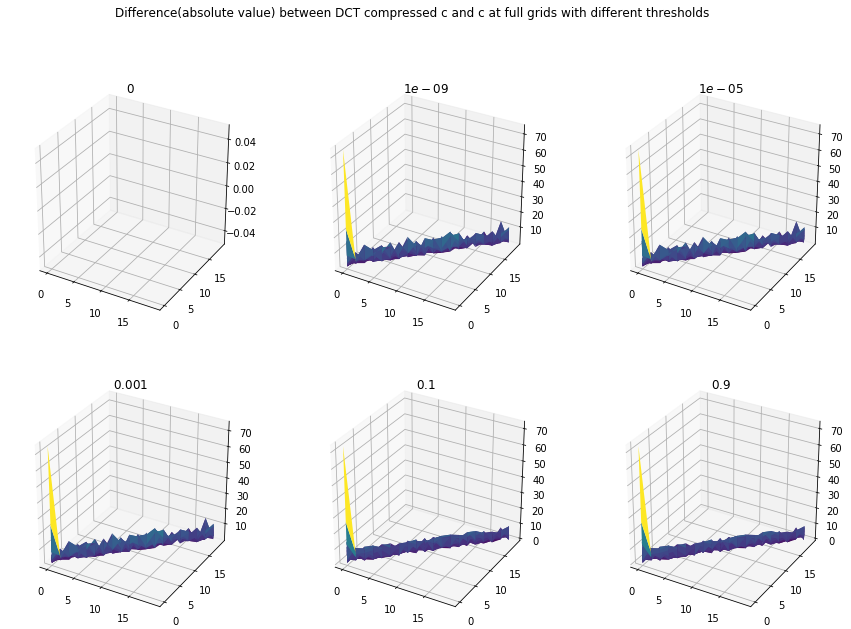

In [29]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Difference(absolute value) between DCT compressed c and c at full grids with different thresholds')
val_lst = np.array([0.000000001,0.00001,0.001,0.1,0.9])
ax=fig.add_subplot(2,3,1,projection='3d')
ax.plot_surface(range(c_diff.shape[0]),range(c_diff.shape[1]),c_grids-c_grids)
ax.set_title('0')
for i in range(len(val_lst)):
    c_dct_rdc = c_dct*(abs(c_dct)>val_lst[i]*c_dct.max())
    c_approx0 = sf.idct(c_dct_rdc,axis=0,norm='ortho')
    c_approx = sf.idct(c_approx0,axis=0,norm='ortho').reshape(grid0,grid1)
    c_diff = abs(c_approx -c_grids)
    ax = fig.add_subplot(2,3,i+2,projection='3d')
    ax.set_title(r'${}$'.format(val_lst[i]))
    ax.plot_surface(range(c_diff.shape[0]),range(c_diff.shape[1]),c_diff,rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')